#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#### Data Collection and Processing

In [2]:
# Loading the Dataset

data=pd.read_csv("C:\\Users\\ditib\\Downloads\\gld_price_data.csv")


In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.shape

(2290, 6)

#### Basic Info about Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


#### Statistical measures of Data

In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
numeric_data =data.select_dtypes(include=[np.number])
cor = numeric_data.corr()

#### Constructing a heatmap to understand the correlation

<Axes: >

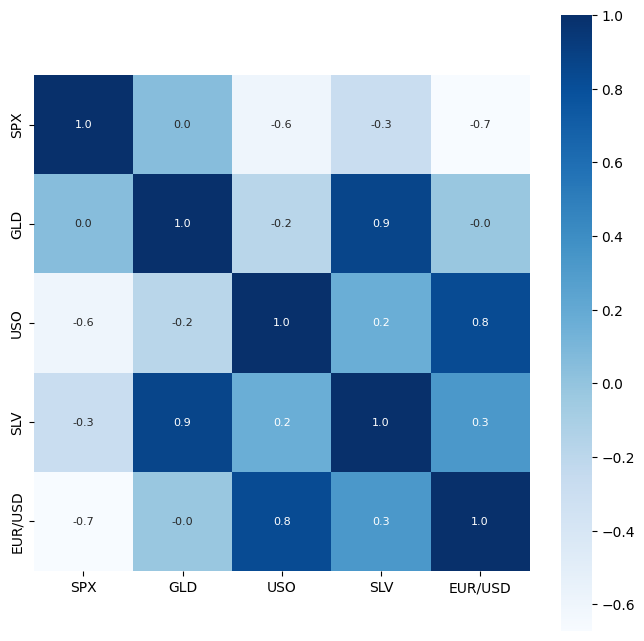

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={"size":8},cmap='Blues')

#### Correlation values of GLD

In [10]:
print(cor['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


#### Check the distribution of the Gold Price

C:\Users\ditib\AppData\Local\Temp\ipykernel_8728\3224253248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

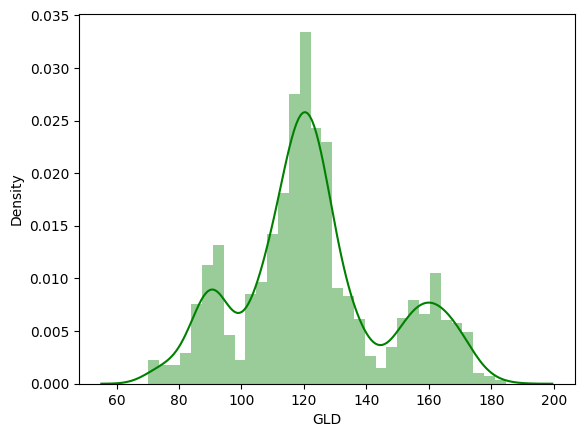

In [11]:
sns.distplot(data['GLD'],color='green')

#### Splitting the Features and Target

In [12]:
x = data.drop(['Date','GLD'],axis=1)
y = data['GLD']

In [13]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Splitting Training Data and Testing Data 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

#### Model Training: Random Forest Regression

In [16]:
reg = RandomForestRegressor(n_estimators=100)

#### Training the Model

In [17]:
reg.fit(x_train,y_train)

RandomForestRegressor()

#### Model Evaluation

In [18]:
test_data_prediction=reg.predict(x_test)

In [19]:
print(test_data_prediction)

[168.57159989  81.85000003 115.80370007 127.78740088 120.93630103
 155.02789778 150.2871982  126.04110038 117.46159856 125.95510112
 116.61150085 171.86280059 141.95029893 167.9998991  115.25199979
 117.6499004  139.50850252 170.31900105 159.82570377 158.98039893
 155.26060037 125.21580014 175.57909996 157.23480287 125.21030044
  93.90779932  77.27530021 120.56719993 119.1213995  167.59029948
  88.31600057 125.25909981  91.01000077 117.68210032 121.11709957
 136.32160025 115.37550154 115.2924006  146.49329925 107.0698006
 104.67660259  87.19919809 126.46920049 117.83150025 152.6773995
 119.70189998 108.57259957 108.01099833  93.17230018 127.08209805
  74.65830047 113.61859947 121.37109987 111.33159869 118.85749877
 121.07089933 158.61990101 167.94510075 147.12729722  85.95809862
  94.19470043  86.9257991   90.61989991 118.97970084 126.36230046
 127.65130018 170.46639996 122.23629918 117.68529856  98.28340027
 168.76020161 143.16219902 131.65190298 121.21770216 120.88619936
 119.6193006

#### R Squared error

In [20]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9888875589201053


#### Compare the actual values and predicted values in a plot

In [21]:
y_test = list(y_test)

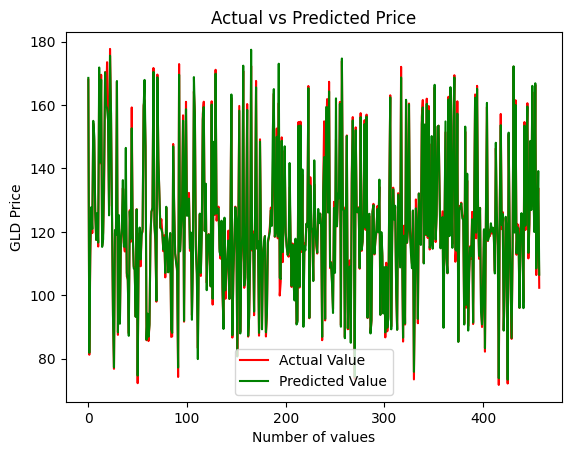

In [22]:
plt.plot(y_test, color='red', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()